결측값때문에 행의 개수가 달라짐 -> 결측값 처리가 우선시 되어야 함 -> interpolate 를 통해 선형 보간 해줌

In [12]:
# from . import _distributor_init
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dangjin_fcst = pd.read_csv('data/add_data_dangjin.csv') # 당진시 기상예보 데이터
dangjin_obs = pd.read_csv('data/dangjin_obs_data.csv') # 당진시 기상관측 데이터
energy = pd.read_csv('data/add_energy.csv') # 에너지 발생량 데이터 (여기에서는 dangjin 컬럼의 데이터를 사용)

In [17]:
dangjin_obs_df = dangjin_obs.copy()
dangjin_fcst_df = dangjin_fcst.copy()
energy_df = energy.copy()

In [4]:
dangjin_fcst_df

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos,declination,sunrise,sunset,altitude,Insolation
0,2015-01-01 01:00:00,-4.200000,59.333333,14.800000,319.333333,3.0,11.226001,-9.644527,-8.660254e-01,-5.000000e-01,-0.004229,0.999991,-23.085911,7.823650,17.189351,0.0,0.0
1,2015-01-01 02:00:00,-4.800000,59.666667,15.000000,321.666667,3.0,11.766235,-9.303532,-9.659258e-01,-2.588190e-01,-0.003512,0.999994,-23.085911,7.823650,17.189351,0.0,0.0
2,2015-01-01 03:00:00,-5.400000,60.000000,15.200000,324.000000,3.0,12.297058,-8.934336,-1.000000e+00,-1.075621e-11,-0.002795,0.999996,-23.085911,7.823650,17.189351,0.0,0.0
3,2015-01-01 04:00:00,-5.400000,60.000000,15.200000,325.666667,3.0,12.551709,-8.572900,-9.659258e-01,2.588190e-01,-0.002079,0.999998,-23.085911,7.823650,17.189351,0.0,0.0
4,2015-01-01 05:00:00,-5.400000,60.000000,15.200000,327.333333,3.0,12.795739,-8.204210,-8.660254e-01,5.000000e-01,-0.001362,0.999999,-23.085911,7.823650,17.189351,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54019,2021-02-28 20:00:00,7.666667,66.666667,1.133333,124.333333,4.0,-0.639207,0.935873,2.588190e-01,-9.659258e-01,0.850285,0.526323,-8.293705,6.993442,17.970808,0.0,0.0
54020,2021-02-28 21:00:00,7.000000,70.000000,1.300000,18.000000,4.0,1.236373,0.401722,9.206058e-12,-1.000000e+00,0.850662,0.525713,-8.293705,6.993442,17.970808,0.0,0.0
54021,2021-02-28 22:00:00,6.833333,71.666667,1.533333,20.166667,4.0,1.439330,0.528620,-2.588190e-01,-9.659258e-01,0.851039,0.525103,-8.293705,6.993442,17.970808,0.0,0.0
54022,2021-02-28 23:00:00,6.666667,73.333333,1.766667,22.333333,4.0,1.634147,0.671323,-5.000000e-01,-8.660254e-01,0.851415,0.524493,-8.293705,6.993442,17.970808,0.0,0.0


In [5]:
# dangjin_obs[dangjin_obs['일시'].dt.hour==14]
dangjin_obs_df['일시'] = pd.to_datetime(dangjin_obs['일시'])
dangjin_obs_df[dangjin_obs_df['일시'].dt.hour==11]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
11,129,서산,2018-03-01 11:00:00,0.5,9.1,320.0,58.0,NaN
35,129,서산,2018-03-02 11:00:00,-0.7,1.4,250.0,29.0,NaN
59,129,서산,2018-03-03 11:00:00,9.1,0.7,160.0,23.0,NaN
83,129,서산,2018-03-04 11:00:00,11.8,1.0,340.0,93.0,NaN
107,129,서산,2018-03-05 11:00:00,6.1,5.5,20.0,73.0,NaN
...,...,...,...,...,...,...,...,...
25517,129,서산,2021-01-27 11:00:00,3.7,2.7,360.0,31.0,2.0
25541,129,서산,2021-01-28 11:00:00,1.6,5.8,290.0,88.0,8.0
25565,129,서산,2021-01-29 11:00:00,-5.0,2.5,20.0,51.0,2.0
25589,129,서산,2021-01-30 11:00:00,4.6,3.2,180.0,75.0,9.0


In [6]:
dangjin_obs_df[3480:3500] # dangjin_obs_data 의 일시 2018-7-24 11:00 ~ 16:00 행이 없음 (index 3490, 3491 사이), 그래서 energy_df 와 행 개수가 6개 차이남

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3480,129,서산,2018-07-24 00:00:00,25.1,0.4,0.0,93.0,NaN
3481,129,서산,2018-07-24 01:00:00,25.7,0.3,0.0,89.0,NaN
3482,129,서산,2018-07-24 02:00:00,25.0,0.4,0.0,96.0,NaN
3483,129,서산,2018-07-24 03:00:00,25.0,0.7,90.0,95.0,NaN
3484,129,서산,2018-07-24 04:00:00,24.4,0.1,0.0,98.0,NaN
3485,129,서산,2018-07-24 05:00:00,24.4,1.2,70.0,98.0,NaN
3486,129,서산,2018-07-24 06:00:00,24.0,0.1,0.0,97.0,NaN
3487,129,서산,2018-07-24 07:00:00,25.7,0.0,0.0,90.0,NaN
3488,129,서산,2018-07-24 08:00:00,28.6,0.2,0.0,76.0,NaN
3489,129,서산,2018-07-24 09:00:00,29.9,1.7,290.0,73.0,NaN


In [7]:
# 삽입할 데이터를 만들어줌
new_data = dangjin_obs_df[:6].copy()
new_data['일시'] = ['2018-07-24 11:00:00', '2018-07-24 12:00:00', '2018-07-24 13:00:00', '2018-07-24 14:00:00', '2018-07-24 15:00:00', '2018-07-24 16:00:00']
new_data['기온(°C)'] = pd.Series()
new_data['풍속(m/s)'] = pd.Series()
new_data['풍향(16방위)'] = pd.Series()
new_data['습도(%)'] = pd.Series()
new_data['전운량(10분위)'] = pd.Series()
new_data

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to s

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-07-24 11:00:00,NaN,NaN,NaN,NaN,NaN
1,129,서산,2018-07-24 12:00:00,NaN,NaN,NaN,NaN,NaN
2,129,서산,2018-07-24 13:00:00,NaN,NaN,NaN,NaN,NaN
3,129,서산,2018-07-24 14:00:00,NaN,NaN,NaN,NaN,NaN
4,129,서산,2018-07-24 15:00:00,NaN,NaN,NaN,NaN,NaN
5,129,서산,2018-07-24 16:00:00,NaN,NaN,NaN,NaN,NaN


In [8]:
idx = 3491 # 중간에 삽입할 index값
temp1 = dangjin_obs_df[dangjin_obs_df.index < idx].copy()
temp2 = dangjin_obs_df[dangjin_obs_df.index >= idx].copy()
dangjin_obs_df = temp1.append(new_data, ignore_index=True).append(temp2, ignore_index=True)
dangjin_obs_df[3480:3510]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3480,129,서산,2018-07-24 00:00:00,25.1,0.4,0.0,93.0,NaN
3481,129,서산,2018-07-24 01:00:00,25.7,0.3,0.0,89.0,NaN
3482,129,서산,2018-07-24 02:00:00,25.0,0.4,0.0,96.0,NaN
3483,129,서산,2018-07-24 03:00:00,25.0,0.7,90.0,95.0,NaN
3484,129,서산,2018-07-24 04:00:00,24.4,0.1,0.0,98.0,NaN
3485,129,서산,2018-07-24 05:00:00,24.4,1.2,70.0,98.0,NaN
3486,129,서산,2018-07-24 06:00:00,24.0,0.1,0.0,97.0,NaN
3487,129,서산,2018-07-24 07:00:00,25.7,0.0,0.0,90.0,NaN
3488,129,서산,2018-07-24 08:00:00,28.6,0.2,0.0,76.0,NaN
3489,129,서산,2018-07-24 09:00:00,29.9,1.7,290.0,73.0,NaN


In [9]:
dangjin_obs_df[dangjin_obs_df.isnull().any(axis=1)].head(30)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN
5,129,서산,2018-03-01 05:00:00,4.1,4.4,270.0,97.0,NaN
6,129,서산,2018-03-01 06:00:00,3.5,7.9,320.0,93.0,NaN
7,129,서산,2018-03-01 07:00:00,2.2,6.4,290.0,86.0,NaN
8,129,서산,2018-03-01 08:00:00,1.0,7.7,320.0,82.0,NaN
9,129,서산,2018-03-01 09:00:00,0.3,8.9,320.0,71.0,NaN


In [15]:
# date time 사용법
date_time = pd.to_datetime(dangjin_fcst_df['Forecast_time'], format='%Y-%m-%d %H:%M')

In [18]:
temp_energy_df = energy_df['dangjin'][23:].copy().reset_index(drop=True)
dangjin_fcst_energy_df = pd.merge(dangjin_fcst_df, temp_energy_df, left_index=True, right_index=True) # dangjin_fcst_df 와 energy_df['dangjin'] 을 합병

In [36]:
import platform
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

<Figure size 1440x360 with 0 Axes>

D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


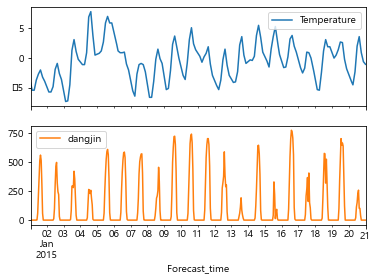

In [21]:
plt.figure(figsize=(20,5))
plot_cols = ['Temperature', 'dangjin'] # 관측 데이터의 기온 / 예보 데이터의 기온 / 태양광 에너지 발생량

plot_features = dangjin_fcst_energy_df[plot_cols][:480] # 20일간의 데이터
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [22]:
dangjin_fcst_energy_df

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Wind_X,Wind_Y,Day sin,Day cos,Year sin,Year cos,declination,sunrise,sunset,altitude,Insolation,dangjin
0,2015-01-01 01:00:00,-4.200000,59.333333,14.800000,319.333333,3.000000,11.226001,-9.644527,-8.660254e-01,-5.000000e-01,-0.004229,0.999991,-23.085911,7.823650,17.189351,0.0,0.0,0.0
1,2015-01-01 02:00:00,-4.800000,59.666667,15.000000,321.666667,3.000000,11.766235,-9.303532,-9.659258e-01,-2.588190e-01,-0.003512,0.999994,-23.085911,7.823650,17.189351,0.0,0.0,0.0
2,2015-01-01 03:00:00,-5.400000,60.000000,15.200000,324.000000,3.000000,12.297058,-8.934336,-1.000000e+00,-1.075621e-11,-0.002795,0.999996,-23.085911,7.823650,17.189351,0.0,0.0,0.0
3,2015-01-01 04:00:00,-5.400000,60.000000,15.200000,325.666667,3.000000,12.551709,-8.572900,-9.659258e-01,2.588190e-01,-0.002079,0.999998,-23.085911,7.823650,17.189351,0.0,0.0,0.0
4,2015-01-01 05:00:00,-5.400000,60.000000,15.200000,327.333333,3.000000,12.795739,-8.204210,-8.660254e-01,5.000000e-01,-0.001362,0.999999,-23.085911,7.823650,17.189351,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53324,2021-01-30 21:00:00,-1.000000,75.000000,0.300000,18.000000,1.000000,0.285317,0.092705,2.896441e-12,-1.000000e+00,0.495459,0.868632,-17.782271,7.506376,17.487461,0.0,0.0,0.0
53325,2021-01-30 22:00:00,-1.333333,76.666667,0.683333,34.666667,1.333333,0.562025,0.388681,-2.588190e-01,-9.659258e-01,0.496081,0.868276,-17.782271,7.506376,17.487461,0.0,0.0,0.0
53326,2021-01-30 23:00:00,-1.666667,78.333333,1.066667,51.333333,1.666667,0.666441,0.832847,-5.000000e-01,-8.660254e-01,0.496703,0.867920,-17.782271,7.506376,17.487461,0.0,0.0,0.0
53327,2021-01-31 00:00:00,-2.000000,80.000000,1.450000,68.000000,2.000000,0.543180,1.344417,-7.071068e-01,-7.071068e-01,0.497325,0.867564,-17.782271,7.506376,17.487461,0.0,0.0,0.0


In [23]:
import matplotlib.pyplot as plt

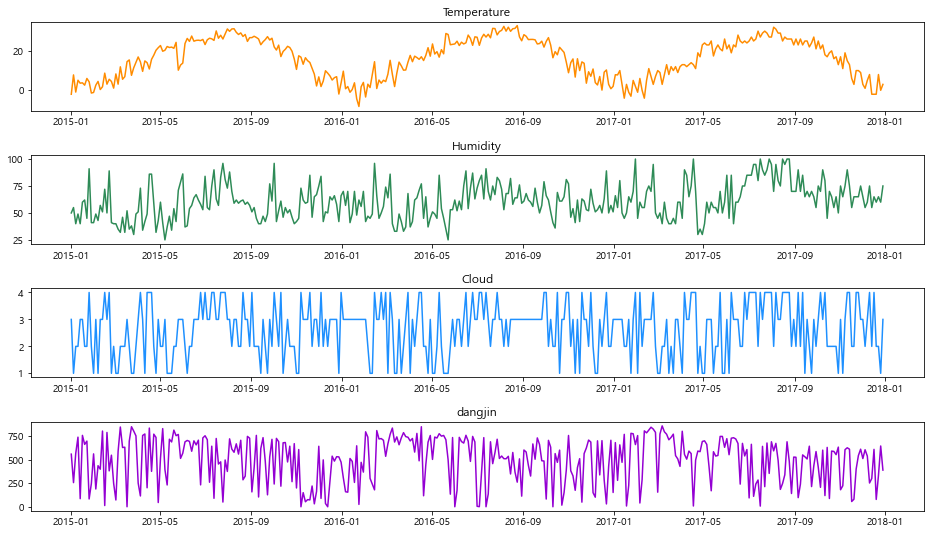

In [24]:
plot_cols = ['Temperature', 'Humidity', 'Cloud', 'dangjin', ] # 관측 데이터의 기온 / 관측 데이터의 전운량 / 관측 데이터의 풍속 /태양광 에너지 발생량
plot_colors = ['darkorange', 'seagreen', 'dodgerblue', 'darkviolet']

# plot_features = dangjin_obs_fcst_energy_df[plot_cols][14:8760:24] # 365일간의 데이터
# plot_features.index = date_time[14:8760:24]
# # plot_features.set_figwidth(20)
# # _ = plot_features.plot(subplots=True, figsize(20, 5))
# fig, ax = plot_features.subplot()
# # plt.show()

plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(plot_cols):
    plot_features = dangjin_fcst_energy_df[col][14:26280:72] # 365일간의 데이터
    plot_features.index = date_time[14:26280:72]
    ax = plt.subplot(4,1,i+1)
#     ax.plot(dangjin_obs_fcst_energy_df[col][14:8760:24])
    ax.set_title(col)
    ax.plot(plot_features, color=plot_colors[i])
#     plt.show()

In [28]:
dangjin_fcst_energy_df['log_dangjin'] = dangjin_fcst_energy_df.dangjin.apply(np.log1p)

<Figure size 1440x360 with 0 Axes>

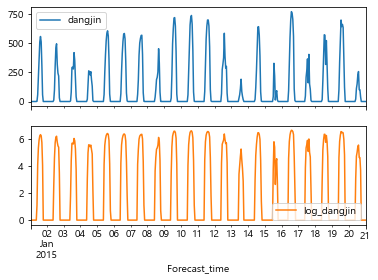

In [30]:
plt.figure(figsize=(20,5))
plot_cols = ['dangjin', 'log_dangjin'] # 태양광 에너지 발생량 / 태양광 에너지 발생량에 로그를 취한 데이터

plot_features = dangjin_fcst_energy_df[plot_cols][:480] # 20일 간의 데이터
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

Text(0, 0.5, 'Wind Velocity [m/s]')

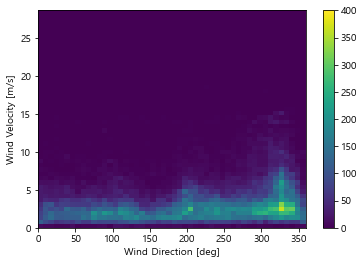

In [31]:
plt.hist2d(dangjin_fcst_energy_df['WindDirection'], dangjin_fcst_energy_df['WindSpeed'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

(-27.13638406521897,
 20.498550013218573,
 -16.99207547758802,
 25.746969787280825)

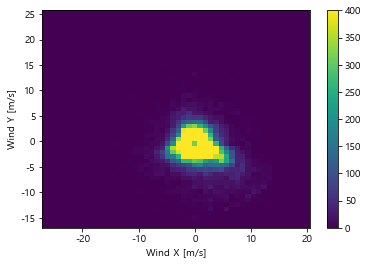

In [38]:
plt.rc('axes', unicode_minus=False)
plt.hist2d(dangjin_fcst_energy_df['Wind_X'], dangjin_fcst_energy_df['Wind_Y'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')